In [19]:
import pandas as pd

In [20]:
dataset = pd.read_csv("/media/ubaid-ur-rehman/Artifacts/CodeData/dataset/saved_data.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [21]:
dataset.head(10)

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
5,you should all sit down together and watch the...,-1
6,was teens when discovered zen meditation was ...,1
7,jesus was zen meets jew,0
8,there are two varieties christians dogmatic th...,-1
9,dont worry about trying explain yourself just ...,1


In [22]:
dataset["category"].value_counts()

category
 1    15830
 0    13142
-1     8277
Name: count, dtype: int64

In [23]:
display(dataset[dataset["clean_comment"].isna()],dataset[dataset["clean_comment"].isna()]["category"].value_counts())

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


category
0    100
Name: count, dtype: int64

In [24]:
(dataset.shape,
dataset.dropna(inplace=True),
dataset.shape)

((37249, 2), None, (37149, 2))

In [25]:
display(dataset["clean_comment"].duplicated().sum(),
dataset[dataset["clean_comment"].duplicated()])

350

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [26]:
dataset.drop_duplicates(inplace=True)

In [27]:
dataset

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [28]:
dataset[dataset["clean_comment"].str.strip() == ""]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [29]:
dataset[dataset["clean_comment"].apply(lambda x: x.strip() == "")]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [30]:
dataset[~(dataset["clean_comment"].str.strip() == "")]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [31]:
dataset[dataset["clean_comment"].str.contains("\n")]

,clean_comment,category
106,pretty sure this sarcasm satire the news 1500...,1
217,lots streams this site vietnam arsenal html\n,0
317,the govt should have only one religion says t...,0
448,what missing jpg\nand why this brilliant edit ...,1
495,you wondering whether girl will get through t...,1
...,...,...
36687,for all the blinkers like was the target audie...,1
36919,y6sg1xuovbb0czfwjpug0h html\nfull credit anti...,1
36933,can the same applied reddit and randimods remo...,0
37048,well isn that nice see looks really good our j...,1


In [32]:
dataset["clean_comment"] = dataset["clean_comment"].apply(lambda x:x.lower())
dataset

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [33]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re
# # Ensure necessary NLTK data is downloaded
# nltk.download('stopwords')
# nltk.download('wordnet')

In [34]:
# Define the preprocessing function
def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()

    # Remove trailing and leading whitespaces
    comment = comment.strip()

    # Remove newline characters
    comment = re.sub(r'\n', ' ', comment)

    # Remove non-alphanumeric characters, except punctuation
    comment = re.sub(r'[^A-Za-z0-9\s!?.,]', '', comment)

    # Remove stopwords but retain important ones for sentiment analysis
    stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}
    comment = ' '.join([word for word in comment.split() if word not in stop_words])

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])

    return comment

In [35]:
dataset["clean_comment"] = dataset["clean_comment"].apply(preprocess_comment)
dataset

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [36]:
dataset.isnull().sum()

clean_comment    0
category         0
dtype: int64

In [18]:
# dataset.to_csv('reddit_preprocessing.csv', index=False)

In [82]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
x = dataset["clean_comment"]
y = dataset["category"]
vector = CountVectorizer(max_features=10000, )
x = vector.fit_transform(x).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [92]:
x.shape

(36799, 10000)

In [94]:
# Step 1: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

n_estimators = 200
max_depth = 15

# Initialize and train the model
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Log metrics for each class and accuracy
accuracy = accuracy_score(y_test, y_pred)



# Display final accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.6474184782608695 classification_rep: {'-1': {'precision': 1.0, 'recall': 0.0030303030303030303, 'f1-score': 0.006042296072507553, 'support': 1650.0}, '0': {'precision': 0.66976, 'recall': 0.8188575899843505, 'f1-score': 0.7368421052631579, 'support': 2556.0}, '1': {'precision': 0.6304964539007092, 'recall': 0.8455928979074192, 'f1-score': 0.7223726977248104, 'support': 3154.0}, 'accuracy': 0.6474184782608695, 'macro avg': {'precision': 0.7667521513002363, 'recall': 0.5558269303073576, 'f1-score': 0.48841903302015854, 'support': 7360.0}, 'weighted avg': {'precision': 0.7269690727721246, 'recall': 0.6474184782608695, 'f1-score': 0.5668072959505871, 'support': 7360.0}}


Text(0.5, 1.0, 'Confusion Matrix')

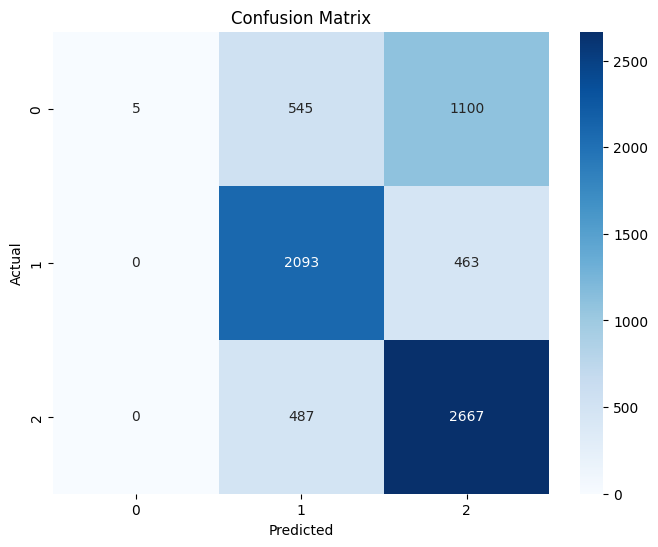

In [95]:
# Confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

In [100]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       1.00      0.00      0.01      1650
           0       0.67      0.82      0.74      2556
           1       0.63      0.85      0.72      3154

    accuracy                           0.65      7360
   macro avg       0.77      0.56      0.49      7360
weighted avg       0.73      0.65      0.57      7360



In [2]:
!pip install cookiecutter


INFO: pip is looking at multiple versions of arrow to determine which version is compatible with other requirements. This could take a while.
